***Kaggle Titanic Competition***

In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from keras import *
import numpy as np 
import os as os
import keras

In [5]:
#read the csv files
train_df = pd.read_csv(os.path.abspath('train.csv'))  
test_df = pd.read_csv(os.path.abspath('test.csv'))  

In [319]:
# X_train

train_df2= train_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
train_df2.dropna(axis = 0, inplace=True)

#Number of NaN's to check if the previous step was correct
nan_count = train_df2.isna().sum()
print(nan_count)
print('\n')
y_train = train_df2.iloc[:,0] #true outcomes
x_train = train_df2.drop(['Survived'],axis=1) # features

x_train = pd.get_dummies(x_train, columns=['Sex'], drop_first=True,dtype=float)
x_train.iloc[:,0] = x_train.iloc[:,0].astype(float)
#y_train = pd.get_dummies(y_train, dtype=float)
x_train.iloc[:,1] = x_train.iloc[:,1]/np.max(x_train.iloc[:,1])
x_train.iloc[:,0] = x_train.iloc[:,0]/3 #third class 
x_train.iloc[:,4] = x_train.iloc[:,4]/np.max(x_train.iloc[:,4]) #third class 


for col in x_train.columns:
    print(col)

print('Number of Samples in x_train: ', len(x_train))
print('Number of features in x_train: ', len(x_train.columns))

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


Pclass
Age
SibSp
Parch
Fare
Sex_male
Number of Samples in x_train:  714
Number of features in x_train:  6


In [317]:
# X_test

teste_df2= test_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)
values={'Age':np.mean(teste_df2.iloc[:,2]),'Fare':np.mean(teste_df2.iloc[:,5]) }
teste_df2 = teste_df2.fillna(value=values)
passengerID = test_df.iloc[:,0]

#Number of NaN's to check if the previous step was correct
#nan_count = teste_df2.isna().sum()
#print(nan_count)
#print('\n')

x_test = teste_df2 # features
#for col in x_test.columns:
 #   print(col)
x_test = pd.get_dummies(x_test, columns=['Sex'], drop_first=True,dtype=float)
x_test.iloc[:,0] = x_test.iloc[:,0].astype(float)
x_test.iloc[:,1] = x_test.iloc[:,1]/np.max(x_test.iloc[:,1])
x_test.iloc[:,0] = x_test.iloc[:,0]/3 #third class 
x_test.iloc[:,4] = x_test.iloc[:,4]/np.max(x_test.iloc[:,4])

print('Number of Samples in x_test: ', len(x_test))

Number of Samples in x_test:  418


**Random Forest**

In [335]:
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth' : [8,9,10],
    'criterion' :['gini', 'entropy','log_loss']
}
CVr = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv= 5)
CVr.fit(x_train, y_train)

CVr.best_params_

c:\Users\rodol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\rodol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", 

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [330]:
model = RandomForestClassifier(random_state=1, n_estimators=200,max_features='sqrt',max_depth=9,criterion='gini')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
pred_df = pd.DataFrame(predictions, columns=['Survived'])
prediction_df = pred_df.set_index(passengerID)
prediction_df.to_csv('submission.csv',header=['Survived'])

**Neural Network Model**

In [310]:
neural = keras.Sequential()
#neural.add(layers.Dense(32, activation='relu',activity_regularizer='l2',bias_regularizer='l2'))
neural.add(layers.Dense(16, activation='relu'))
neural.add(layers.Dropout(0.1))
#neural.add(layers.Dense(64, activation='relu'))
#neural.add(layers.Dropout(0.1))
#neural.add(layers.Dense(128, activation='relu'))
#neural.add(layers.Dense(64, activation='relu',bias_regularizer='l2'))
#neural.add(layers.Dropout(0.2))
#neural.add(layers.Dense(128, activation='relu',bias_regularizer='l2'))
neural.add(layers.Dense(2,activation='softmax'))

neural.compile(
            optimizer = "adam",
            loss = "CategoricalCrossentropy",
            metrics="Accuracy"
        )

Epoch 1/50
18/18 [==============================] - 1s 19ms/step - loss: 0.6690 - Accuracy: 0.5797 - val_loss: 0.6301 - val_Accuracy: 0.6853
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6498 - Accuracy: 0.6322 - val_loss: 0.6080 - val_Accuracy: 0.6783
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6394 - Accuracy: 0.6532 - val_loss: 0.5887 - val_Accuracy: 0.7063
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6196 - Accuracy: 0.6918 - val_loss: 0.5701 - val_Accuracy: 0.7063
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6020 - Accuracy: 0.6970 - val_loss: 0.5510 - val_Accuracy: 0.7483
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5836 - Accuracy: 0.7180 - val_loss: 0.5318 - val_Accuracy: 0.7832
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5707 - Accuracy: 0.7496 - val_loss: 0.5147 - val_Accuracy: 0.8042
Epoch 8/50
18/18 [=

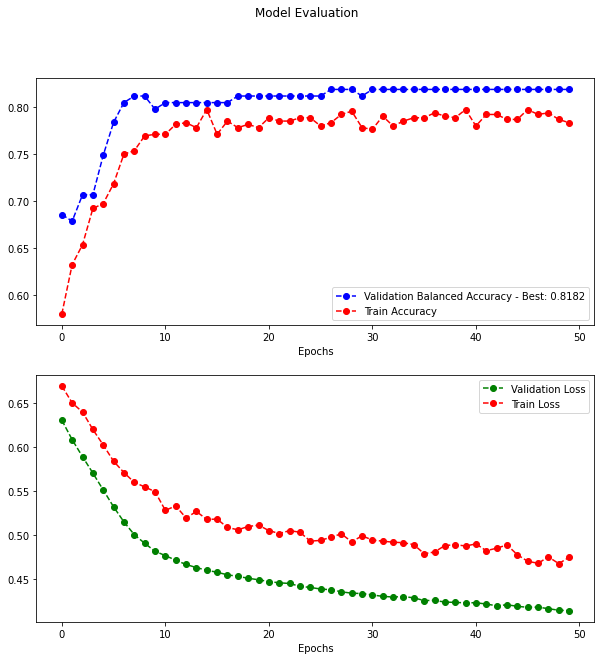

In [311]:
model = neural.fit(
        x_train,
        y_train,
        batch_size=32,
        epochs=50,
        validation_split=0.2)

dtf = pd.DataFrame(model.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('Model Evaluation')

best_bacc =round(max(dtf.iloc[:,3]),4)

ax1.plot(dtf.iloc[:,3],'bo--',label=f'Validation Balanced Accuracy - Best: {best_bacc}')
ax1.plot(dtf.iloc[:,1],'ro--',label='Train Accuracy')
ax1.legend()
ax1.set_xlabel('Epochs')

ax2.plot(dtf.iloc[:,2],'go--',label=f'Validation Loss')
ax2.plot(dtf.iloc[:,0],'ro--',label=f'Train Loss')
ax2.legend()
ax2.set_xlabel('Epochs')

plt.show()

**Prediction for the Neural Network**

In [313]:

y_test = neural.predict(x_test)

survival = []
for i in range(len(y_test[:,0])):
    item = y_test[:,0][i]
    if item >= 0.5:
        survival.append(1)
    else: survival.append(0)

pred_df = pd.DataFrame(survival, columns=['Survived'])
prediction_df = pred_df.set_index(passengerID)
prediction_df.to_csv('submission.csv',header=['Survived'])

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


Pclass
Sex
Age
SibSp
Parch
Fare
Number of Samples in x_test:  418
14/14 [==============================] - 0s 6ms/step


Accuracy before scalling: 0.8252